# Import modules


In [ ]:
import pandas as pd
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, accuracy_score
import numpy as np

#Loading the dataset

In [ ]:
data=pd.read_csv('iris.csv')
X=data.iloc[:,:-1]
Y=data.iloc[:,-1]
data.info()
data.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   SepalLengthCm  150 non-null    float64
 1   SepalWidthCm   150 non-null    float64
 2   PetalLengthCm  150 non-null    float64
 3   PetalWidthCm   150 non-null    float64
 4   Species        150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


#Visualization by graph

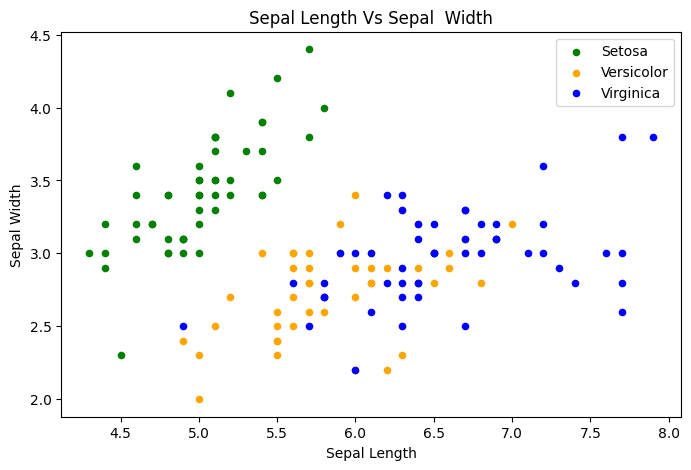

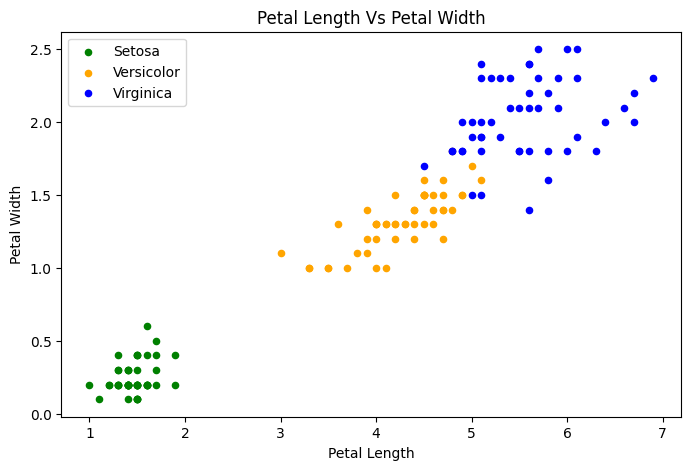

<Figure size 640x480 with 0 Axes>

In [ ]:

fig = data[data.Species == 'Iris-setosa'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='green', label='Setosa')
data[data.Species == 'Iris-versicolor'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='orange', label='Versicolor', ax=fig)
data[data.Species == 'Iris-virginica'].plot(kind='scatter', x='SepalLengthCm', y='SepalWidthCm', color='blue', label='Virginica', ax=fig)

fig.set_xlabel('Sepal Length')
fig.set_ylabel('Sepal Width')
fig.set_title('Sepal Length Vs Sepal  Width')

fig=plt.gcf()
fig.set_size_inches(8, 5)
plt.show()


fig = data[data.Species == 'Iris-setosa'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='green', label='Setosa')
data[data.Species == 'Iris-versicolor'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='orange', label='Versicolor', ax=fig)
data[data.Species == 'Iris-virginica'].plot(kind='scatter', x='PetalLengthCm', y='PetalWidthCm', color='blue', label='Virginica', ax=fig)

fig.set_xlabel('Petal Length')
fig.set_ylabel('Petal Width')
fig.set_title('Petal Length Vs Petal Width')

fig=plt.gcf()
fig.set_size_inches(8, 5)
plt.show()
plt.savefig('Petal_LengthVsWidth.jpeg')


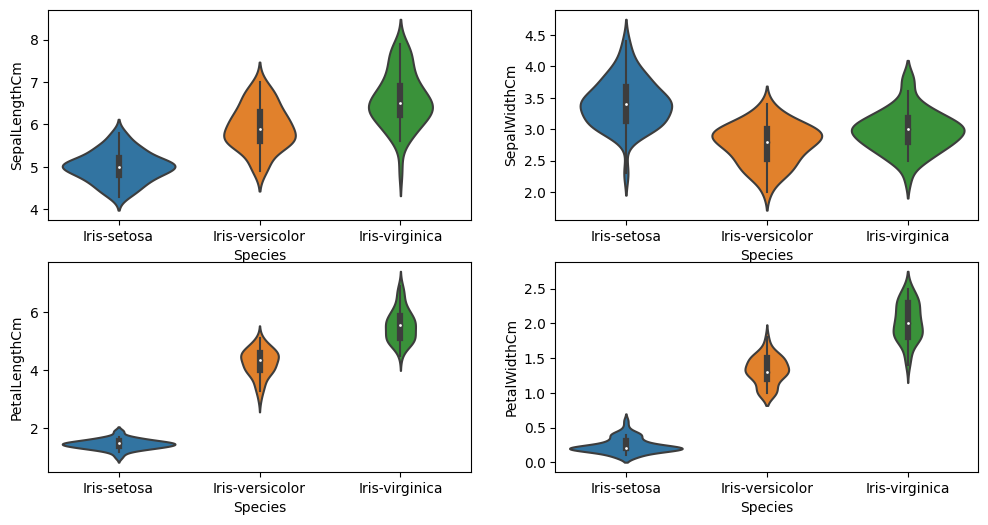

In [ ]:

#violinplot

plt.figure(figsize=(12,6))
plt.subplot(2,2,1)
sns.violinplot(x='Species', y = 'SepalLengthCm', data=data)
plt.subplot(2,2,2)
sns.violinplot(x='Species', y = 'SepalWidthCm', data=data)

plt.subplot(2,2,3)
sns.violinplot(x='Species', y = 'PetalLengthCm', data=data)
plt.subplot(2,2,4)
sns.violinplot(x='Species', y = 'PetalWidthCm', data=data)

plt.show()

#Split the dataset into training and testing sets

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=1)

#Train a Decision Tree Classifier model

In [ ]:
model = DecisionTreeClassifier(random_state=1)
model.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

# Visualize the Decision Tree


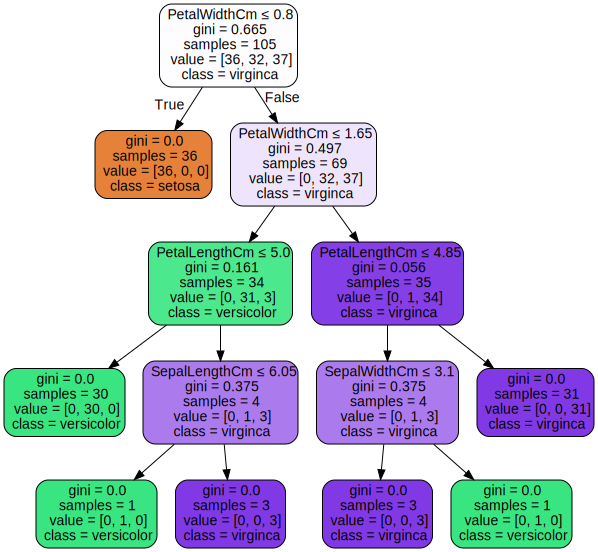

In [ ]:
import graphviz
from sklearn import tree
from IPython.display import display
iris = load_iris()
X=iris.data
Y=iris.target
dot_data = tree.export_graphviz(model, out_file=None, 
                      feature_names=['SepalLengthCm','SepalWidthCm','PetalLengthCm','PetalWidthCm'],  
                      class_names=['setosa','versicolor','virginica'],  
                      filled=True, rounded=True,  
                      special_characters=True)  
graph = graphviz.Source(dot_data) 
graph.render("iris_decision_tree")
display(graph)

#Make predictions on the testing set

In [ ]:
y_pred = model.predict(X_test)

#Compute the confusion matrix

In [ ]:
cm = confusion_matrix(y_test, y_pred)
# Compute the accuracy score
acc = accuracy_score(y_test, y_pred)
print("Accuracy Score:", acc)

Accuracy Score: 0.9555555555555556


#Visualize the confusion matrix

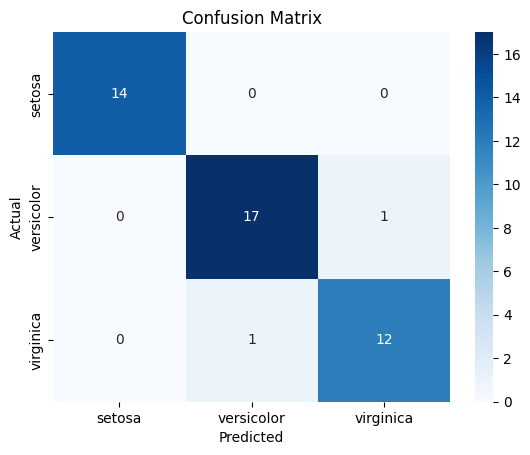

In [ ]:

target_names=['setosa','versicolor','virginica']
sns.heatmap(cm, annot=True, cmap='Blues', fmt='g', xticklabels=['setosa','versicolor','virginica'], yticklabels=['setosa','versicolor','virginica'])
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()

#Testing for a new data

In [ ]:
# Testing the model on Other value
y_pred=model.predict([data.iloc[100,:-1].values])
y_true=data.iloc[100,-1]
print('True class label:- ',y_true)
print('Predicted class label:- ',y_pred[0])

True class label:-  Iris-virginica
Predicted class label:-  Iris-virginica


/usr/local/lib/python3.9/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
